<a href="https://colab.research.google.com/github/cantaruttim/DesafioFieldPRO/blob/main/DesafioFieldPRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Sensor_FieldPRO.csv')
dataset

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature
0,2020-09-30T23:00:00Z,38.0,31.366,9412,0,45123,30
1,2020-10-01T00:00:00Z,NaN,NaN,9412,0,45025,31
2,2020-10-01T01:00:00Z,39.0,31.366,9419,0,44923,31
3,2020-10-01T02:00:00Z,39.0,31.322,9419,0,44825,31
4,2020-10-01T03:00:00Z,38.0,31.240,9416,0,44728,31
...,...,...,...,...,...,...,...
1706,2020-12-11T09:00:00Z,82.0,19.480,9422,3,20669,17
1707,2020-12-11T10:00:00Z,69.0,24.000,9429,3,20606,19
1708,2020-12-11T11:00:00Z,63.0,25.440,9436,3,20529,25
1709,2020-12-11T12:00:00Z,60.0,27.160,9439,3,20442,28


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711 entries, 0 to 1710
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datetime – utc       1711 non-null   object 
 1   air_humidity_100     1705 non-null   float64
 2   air_temperature_100  1705 non-null   float64
 3   atm_pressure_main    1711 non-null   int64  
 4   num_of_resets        1711 non-null   int64  
 5   piezo_charge         1711 non-null   int64  
 6   piezo_temperature    1711 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 93.7+ KB


In [4]:
# verificando os valores faltantes

dataset.isnull().sum()

Datetime – utc         0
air_humidity_100       6
air_temperature_100    6
atm_pressure_main      0
num_of_resets          0
piezo_charge           0
piezo_temperature      0
dtype: int64

In [5]:
# Verificando a porcentagem dos valores faltantes

( dataset.isnull().sum() / len(dataset) ) * 100

Datetime – utc         0.000000
air_humidity_100       0.350672
air_temperature_100    0.350672
atm_pressure_main      0.000000
num_of_resets          0.000000
piezo_charge           0.000000
piezo_temperature      0.000000
dtype: float64

In [6]:
## filtrando os indices vazios
### Podemos observar que são os mesmos indices que estão com os valores faltantes. Vamos substituir os valores faltantes
### pela média de cada coluna
dataset[dataset['air_humidity_100'].isnull()]

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature
1,2020-10-01T00:00:00Z,NaN,NaN,9412,0,45025,31
6,2020-10-01T05:00:00Z,NaN,NaN,9411,0,44537,30
12,2020-10-01T12:00:00Z,NaN,NaN,9438,0,43874,30
16,2020-10-01T16:00:00Z,NaN,NaN,9460,0,43259,30
20,2020-10-01T21:00:00Z,NaN,NaN,9379,0,41914,37
30,2020-10-02T08:00:00Z,NaN,NaN,9398,0,41083,19


In [7]:
dataset[dataset['air_temperature_100'].isnull()]

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature
1,2020-10-01T00:00:00Z,NaN,NaN,9412,0,45025,31
6,2020-10-01T05:00:00Z,NaN,NaN,9411,0,44537,30
12,2020-10-01T12:00:00Z,NaN,NaN,9438,0,43874,30
16,2020-10-01T16:00:00Z,NaN,NaN,9460,0,43259,30
20,2020-10-01T21:00:00Z,NaN,NaN,9379,0,41914,37
30,2020-10-02T08:00:00Z,NaN,NaN,9398,0,41083,19


In [8]:
## ANÁLISE ESTATÍSTICA DESCRITIVA DOS DADOS
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
air_humidity_100,1705.0,60.238710,22.100228,13.00,41.0,61.00,80.0,99.000
air_temperature_100,1705.0,24.660940,6.174219,12.36,19.9,23.02,29.4,42.664
atm_pressure_main,1711.0,9432.838106,26.378333,9350.00,9416.0,9433.00,9450.0,9507.000
num_of_resets,1711.0,1.646406,1.090382,0.00,1.0,2.00,3.0,3.000
piezo_charge,1711.0,42462.030392,13038.238287,16950.00,32020.0,41765.00,53769.0,65533.000
piezo_temperature,1711.0,24.910579,8.374122,11.00,18.0,22.00,32.0,47.000


In [9]:
# Substituindo os valores faltantes com a média dos valores da coluna air_humidity_100
dataset['air_humidity_100'].fillna(
   60.238, inplace = True
)

In [10]:
dataset['air_temperature_100'].fillna(
   24.660, inplace = True
)

In [11]:
# Retiramos todos os valores faltantes
dataset.isnull().sum()

Datetime – utc         0
air_humidity_100       0
air_temperature_100    0
atm_pressure_main      0
num_of_resets          0
piezo_charge           0
piezo_temperature      0
dtype: int64

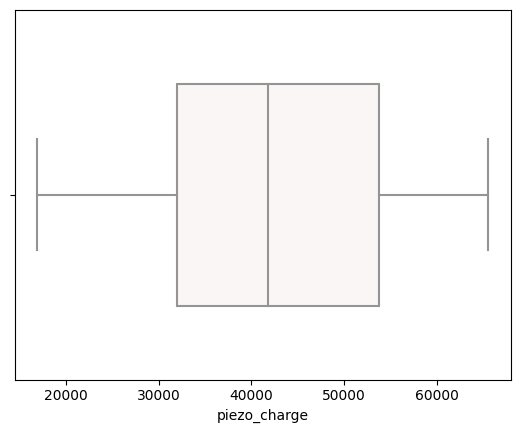

In [12]:
# BOXPLOT DA CARGA ACUMULADA

# Plot the orbital period with horizontal boxes
sns.boxplot(x="piezo_charge", data=dataset,
            whis=[0, 100], width=.6, palette="vlag");

<ipython-input-13-43217ec9031c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot = True);


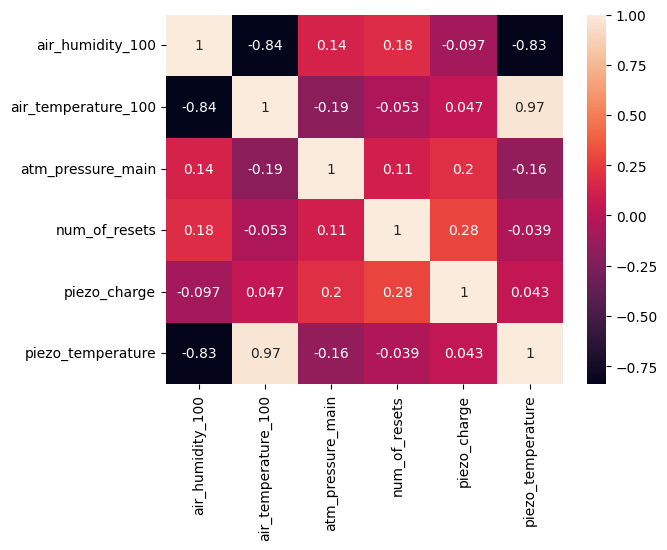

In [13]:
# Verificando a correlção entre as variáveis

sns.heatmap(dataset.corr(), annot = True);

In [14]:
## número de resets

np.unique(dataset['num_of_resets'], return_counts=True)

(array([0, 1, 2, 3]), array([301, 523, 367, 520]))

In [15]:
## número de cargas
### máxima e mínima
dataset['piezo_charge'].max(), dataset['piezo_charge'].min()

(65533, 16950)

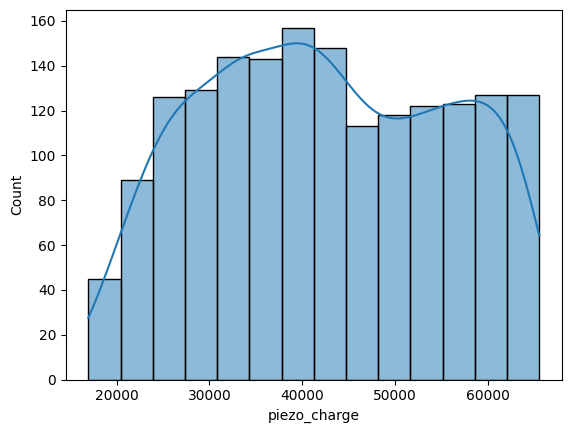

In [17]:
sns.histplot(dataset['piezo_charge'], kde = True);

In [16]:
X = dataset.iloc[:, 1:7].values
X

array([[3.8000e+01, 3.1366e+01, 9.4120e+03, 0.0000e+00, 4.5123e+04,
        3.0000e+01],
       [6.0238e+01, 2.4660e+01, 9.4120e+03, 0.0000e+00, 4.5025e+04,
        3.1000e+01],
       [3.9000e+01, 3.1366e+01, 9.4190e+03, 0.0000e+00, 4.4923e+04,
        3.1000e+01],
       ...,
       [6.3000e+01, 2.5440e+01, 9.4360e+03, 3.0000e+00, 2.0529e+04,
        2.5000e+01],
       [6.0000e+01, 2.7160e+01, 9.4390e+03, 3.0000e+00, 2.0442e+04,
        2.8000e+01],
       [5.6000e+01, 2.9060e+01, 9.4400e+03, 3.0000e+00, 2.0344e+04,
        3.0000e+01]])

In [18]:
# AGRUPAMENTO DOS DADOS

from sklearn.cluster import KMeans

In [19]:
agrupamento = KMeans(n_clusters=2, random_state=1)
agrupamento.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=1)

In [20]:
agrupamento.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [21]:
# Criando a coluna Group utilizando o KMeans para a realização da calibração do modelo
## PODEMOS VERIFICAR A QUAL GRUPO CADA LINHA PERTECE POR MEIO DO .labels_ DO KMeans

dataset['Groups'] = agrupamento.labels_
dataset.head()

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,Groups
0,2020-09-30T23:00:00Z,38.000,31.366,9412,0,45123,30,0
1,2020-10-01T00:00:00Z,60.238,24.660,9412,0,45025,31,0
2,2020-10-01T01:00:00Z,39.000,31.366,9419,0,44923,31,0
3,2020-10-01T02:00:00Z,39.000,31.322,9419,0,44825,31,0
4,2020-10-01T03:00:00Z,38.000,31.240,9416,0,44728,31,0


In [34]:
np.unique(dataset['Groups'], return_counts=True)

(array([0, 1], dtype=int32), array([790, 921]))

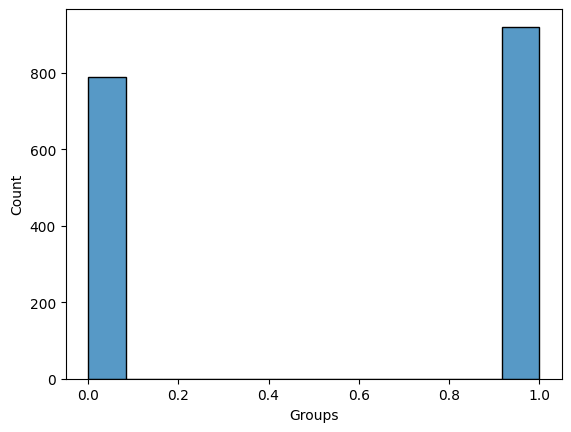

In [25]:
sns.histplot(dataset['Groups']);

In [26]:
y = dataset['Groups'].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

# Teste de Hipótese - Machine Learning

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

In [28]:
resultados_naive_cv = []
resultados_logistica_cv = []
resultados_forest_cv = []
resultados_redeNeural_cv = []
resultados_arvore_cv = []

for i in range(30):
  kfold = KFold(n_splits = 10, shuffle = True, random_state = i)

  naive_bayes = GaussianNB()
  scores = cross_val_score(naive_bayes, X, y, cv = kfold)
  resultados_naive_cv.append(scores.mean())

  logistica = LogisticRegression()
  scores = cross_val_score(logistica, X, y, cv = kfold)
  resultados_logistica_cv.append(scores.mean())

  random_forest = RandomForestClassifier()
  scores = cross_val_score(random_forest, X, y, cv = kfold)
  resultados_forest_cv.append(scores.mean())

  rede_neural = MLPClassifier()
  scores = cross_val_score(rede_neural, X, y, cv = kfold)
  resultados_redeNeural_cv.append(scores.mean())

  arvore = DecisionTreeClassifier()
  scores = cross_val_score(arvore, X, y, cv = kfold)
  resultados_arvore_cv.append(scores.mean())

resultados_naive_cv = np.array(resultados_naive_cv)
resultados_logistica_cv = np.array(resultados_logistica_cv)
resultados_forest_cv = np.array(resultados_forest_cv)
resultados_redeNeural_cv = np.array(resultados_redeNeural_cv)
resultados_arvore_cv = np.array(resultados_arvore_cv)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

## Teste de Hipótese - Shapiro-Wilk

In [76]:
from scipy.stats import shapiro

shapiro(resultados_naive_cv), shapiro(resultados_logistica_cv), shapiro(resultados_forest_cv), shapiro(resultados_redeNeural_cv), shapiro(resultados_arvore_cv)

(ShapiroResult(statistic=0.9155042171478271, pvalue=0.020537598058581352),
 ShapiroResult(statistic=0.8454471230506897, pvalue=0.0004985775449313223),
 ShapiroResult(statistic=0.6812394857406616, pvalue=8.416097898589214e-07),
 ShapiroResult(statistic=0.9340496063232422, pvalue=0.06295952200889587),
 ShapiroResult(statistic=0.47087639570236206, pvalue=2.6728947943865933e-09))

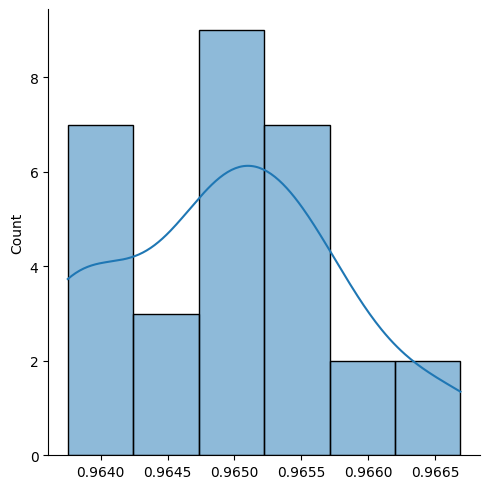

In [70]:
sns.displot(resultados_naive_cv, kde = True);

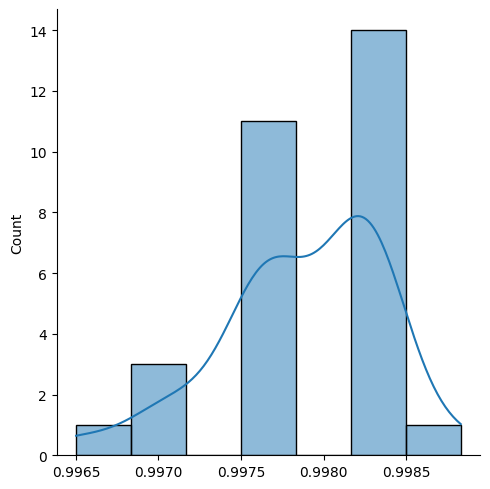

In [71]:
sns.displot(resultados_logistica_cv, kde = True);

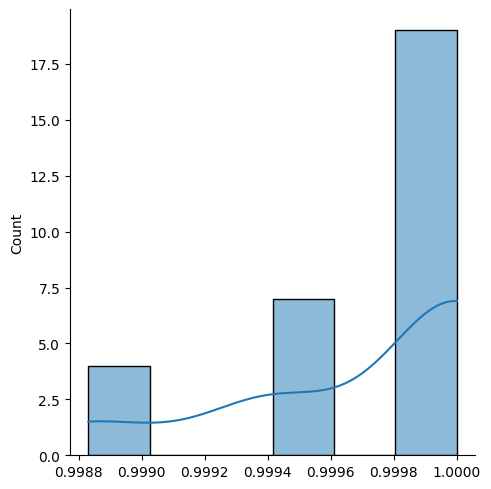

In [72]:
sns.displot(resultados_forest_cv, kde = True);

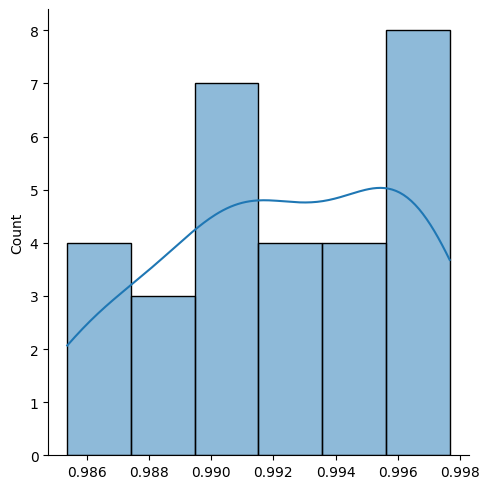

In [73]:
sns.displot(resultados_redeNeural_cv, kde = True);

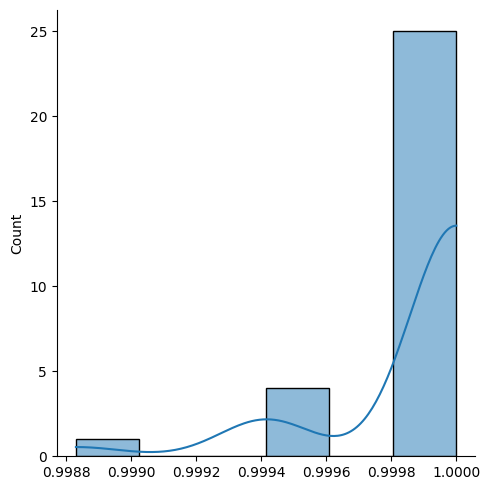

In [74]:
sns.displot(resultados_arvore_cv, kde = True);

## Teste de Hipótese - ANOVA e Tukey algoritmos

In [77]:
from scipy.stats import f_oneway

_, p = f_oneway(resultados_naive_cv, resultados_logistica_cv, resultados_forest_cv, resultados_redeNeural_cv, resultados_arvore_cv)
p

3.4943823039204197e-127

In [78]:
alpha = 0.05
if p <= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada. Dados são diferentes


In [79]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_naive_cv, resultados_logistica_cv, resultados_forest_cv, resultados_redeNeural_cv, resultados_arvore_cv]),
                         'algoritmo': ['naive', 'naive','naive','naive','naive','naive','naive','naive','naive','naive',
                                       'naive', 'naive','naive','naive','naive','naive','naive','naive','naive','naive',
                                       'naive', 'naive','naive','naive','naive','naive','naive','naive','naive','naive',
                                       'logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic',
                                       'logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic',
                                       'logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic','logistic',
                                       'forest','forest','forest','forest','forest','forest','forest','forest','forest','forest',
                                       'forest','forest','forest','forest','forest','forest','forest','forest','forest','forest',
                                       'forest','forest','forest','forest','forest','forest','forest','forest','forest','forest',
                                       'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural,', 'rede_neural',
                                       'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural',
                                       'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural',
                                       'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                                       'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                                       'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore' ] }

In [80]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.965521,naive
1,0.964358,naive
2,0.966690,naive
3,0.964933,naive
4,0.963773,naive
...,...,...
145,0.999419,arvore
146,1.000000,arvore
147,1.000000,arvore
148,1.000000,arvore


In [81]:
from statsmodels.stats.multicomp import MultiComparison

compara_grupos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])
teste = compara_grupos.tukeyhsd()
print(teste)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower   upper  reject
---------------------------------------------------------------
     arvore       forest  -0.0002 0.9987 -0.0015  0.0011  False
     arvore     logistic   -0.002 0.0002 -0.0033 -0.0007   True
     arvore        naive  -0.0349    0.0 -0.0362 -0.0337   True
     arvore  rede_neural  -0.0074    0.0 -0.0087 -0.0061   True
     arvore rede_neural,  -0.0133    0.0 -0.0184 -0.0083   True
     forest     logistic  -0.0018 0.0008 -0.0031 -0.0006   True
     forest        naive  -0.0348    0.0 -0.0361 -0.0335   True
     forest  rede_neural  -0.0072    0.0 -0.0085 -0.0059   True
     forest rede_neural,  -0.0131    0.0 -0.0182 -0.0081   True
   logistic        naive  -0.0329    0.0 -0.0342 -0.0317   True
   logistic  rede_neural  -0.0054    0.0 -0.0067 -0.0041   True
   logistic rede_neural,  -0.0113    0.0 -0.0164 -0.0063   True
      naive  rede_neural   0.0275    0.0

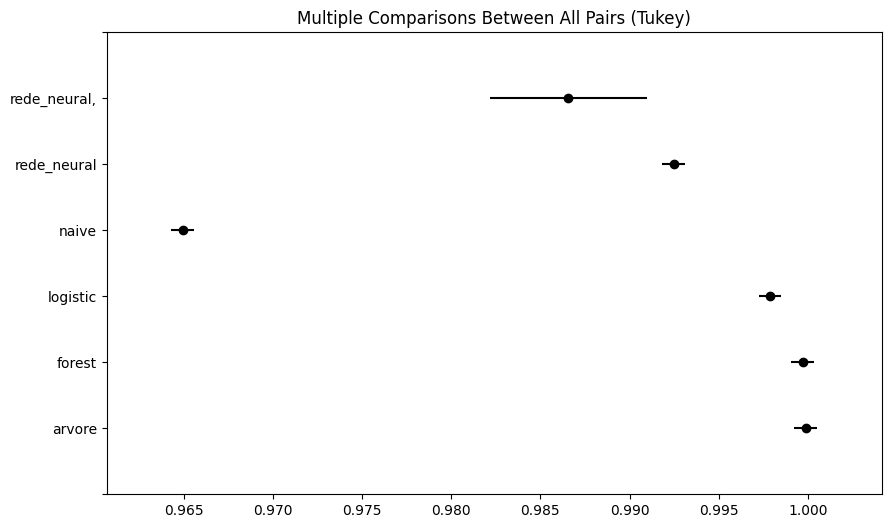

In [82]:
teste.plot_simultaneous();
